In [1]:
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm.auto import tqdm

/home/rhari/anaconda3/envs/mis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset=load_dataset("kowndinya23/Kvasir-SEG")

Found cached dataset parquet (/home/rhari/.cache/huggingface/datasets/kowndinya23___parquet/kowndinya23--Kvasir-SEG-1148bd2b629a37ee/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 2/2 [00:00<00:00, 731.80it/s]


In [11]:
pbar = tqdm(total=len(dataset["train"]))
polyp_hist=np.zeros(256)
non_polyp_hist=np.zeros(256)
for i in range(len(dataset["train"])):
    img = np.array(dataset["train"][i]["image"])
    mask = np.array(dataset["train"][i]["annotation"])
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # plt.imshow(img, cmap="gray")
    # get the polyp histogram
    polyp_hist += np.histogram(img[mask!=0], bins=256, range=(0, 255))[0]
    # get the non-polyp histogram
    non_polyp_hist += np.histogram(img[mask==0], bins=256, range=(0, 255))[0]
    # print(np.histogram(img[mask!=0], bins=256, range=(0, 255))[0])
    # print(np.histogram(img[mask==0], bins=256, range=(0, 255))[0])
    pbar.update(1)
    # break

100%|█████████▉| 879/880 [00:10<00:00, 68.84it/s]

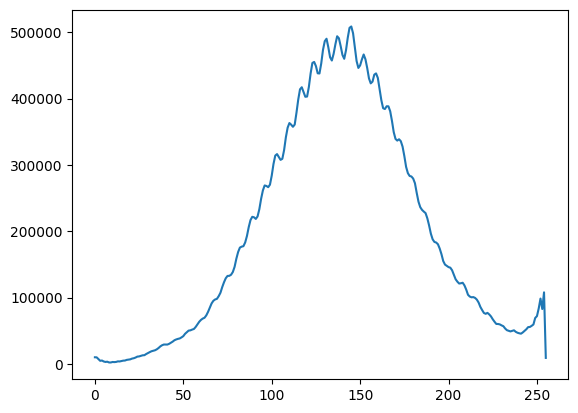

In [12]:
plt.plot(polyp_hist, label="polyp")

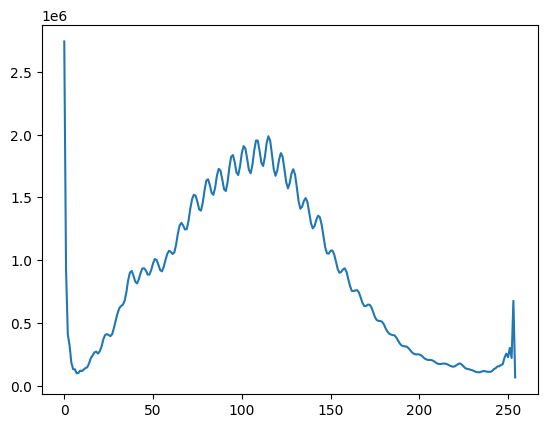

In [14]:
plt.plot(non_polyp_hist[1:], label="non-polyp")